<h1>Visualizing MLP Weights</h1>

<h3>Open ML</h3>

<p>
    Open ML (www.openml.org) has a database of large datasets that can be used for a variety of machine learning problems.<br/>
    Scikit-learn has a function <strong>fetch_openml</strong> for directly downloading datasets from the Open ML database.
</p>

<p>
    In this notebook, we are switching to use a more granular version of the MNIST dataset from Open ML which has 784 pixels (28 x 28).
</p>

<p>First we fetch the desired dataset as shown below:</p>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("minimum of X: ", np.min(X))
print("maximum of y: ", np.max(X))
print("Targets: ", np.unique(y))

X shape:  (70000, 784)
y shape:  (70000,)
minimum of X:  0
maximum of y:  255
Targets:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


<p>We now have a dataset containing: </p>
<ul>
    <li>70,000 datapoints with 784 features</li>
    <li>The feature values range from 0 to 255 (which we interpret on a gray scale with 0 being white and 255 being black)</li>
    <li>The target values are the numbers 0-9 (stored as strings and not integers!)</li>
</ul>

<p>To keep things simple for better visualization, we implement the following measures:</p>
<ul>
    <li>We use the digits 0-3 only.</li>
    <li>We use only 6 nodes in the hidden layer so that we can look at all of them.</li>
    <li>We will use 'sgd' (stochastic gradient descent) as our solver which requires us to decrease alpha (the learning rate).</li>
</ul>

<p>First, We segment out the desired portion of the dataset.

In [2]:
import pandas as pd

# Convert y to an ordered categorical in order to perform the following comparison
y = y.astype(pd.CategoricalDtype(categories=np.unique(y).tolist(), ordered=True))

X5 = X[y <= '3']
y5 = y[y <= '3']

<p>Below we train/fit a MLP classifier</p>

<strong>Please note that the following section might take quite some time to finish running (about 10-20 minutes)</strong>

In [3]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(
    hidden_layer_sizes=(6,), 
    max_iter=200, 
    alpha=1e-4,
    solver='sgd', 
    random_state=2
)

mlp.fit(X5, y5)

MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

<h3>MLPClassifier Coefficients</h3>

<p>The MLPClassifier stores the coefficients in the <strong>coefs_</strong> attribute. Let’s take a look at them</p>

<p>First we see that it is a list with two elements.</p>

In [4]:
print(len(mlp.coefs_))

2


<p>
    The two elements in the list correspond to the two layers: the <strong>hidden layer</strong> and the <strong>output layer</strong>.
</p>

<p>We have an array of coefficients for each of these layers</p>

<p>Let’s look at the shape of the coefficients for the hidden layer</p>

In [5]:
print(mlp.coefs_[0].shape)

(784, 6)


<p>
    We see that we have a 2-dimensional array of size 784 x 6,<br/>
    Meaning there are 6 nodes and 784 input values feeding into each node.<br/>
    and we have a weight for each of these connections.
</p>

<h3>Visualizing the Hidden Layer</h3>

<p>
    In order to interpret the values, we will need to use a visual representation.<br/>
    This will allow us to get a better understanding of what the neural network is doing.
</p>

<p>We will use the matshow function from matplotlib to draw the images in subplots.</p>

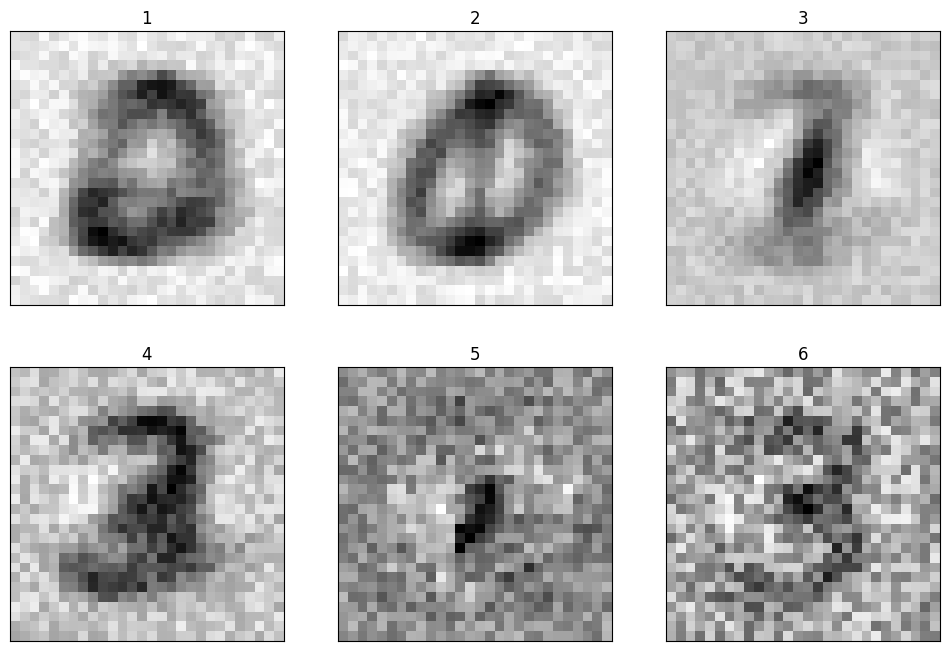

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
    
plt.show()

<p>By examining the node images above, we can see that:</p>
<ul>
    <li>Node 1 is determining if the digit is a 0 or a 2 since you can see both of those values in the image.</li>
    <li>Nodes 4 and 6 are determining if the digit is a 3</li>
    <li><strong>We also note that not every hidden node will have an obvious use.</strong></li>
</ul>

<strong>
    If we decide to change the random state in the MLPClassifier, we are likely to get different results.<br/>
    This is because there can exist many equivalently optimal neural networks that work differently.
</strong>